In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

C:\Users\Tanaji\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Reading data using pandas dataframe


df = pd.read_csv("C:/Users/Varsha/.jupyter/DataSetReviews.csv")

In [3]:
df1 = pd.DataFrame(df, columns = ['reviews.title', 'reviews.rating','reviews.text'])

In [4]:
df2=pd.DataFrame(df1 , columns= ['reviews.rating','reviews.title', 'reviews.text'])

In [5]:
Score = df2['reviews.rating']


In [6]:
#Splitting the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(df2['reviews.title'], df2['reviews.rating'],test_size=0.25, random_state=42)


In [7]:
#Function for stemming the data/ text        
stemmer = PorterStemmer()
from nltk.corpus import stopwords

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [8]:
#Function for tokenization of the text

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)


In [9]:
#--- Training Data set---------

corpus = []
for text in X_train:
   text = str(text).lower()
   text = text.translate(trantab)
   text=tokenize(text)
   corpus.append(text)
        
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
count_vect.get_feature_names()
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)



In [10]:
#--- Test Data set-------------------

test_set = []
for text in X_test:
    text = str(text).lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

#important step
prediction = dict()

In [11]:

#Multinomial Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial']= model.predict(X_test_tfidf)


from sklearn.metrics import accuracy_score

#Accuracy of multinomial----

accuracy_score(y_test,prediction['Multinomial'])


0.69494960869320421

confusion matrix
             precision    recall  f1-score   support

    Rating1       0.71      0.39      0.51       917
    Rating2       0.00      0.00      0.00       440
    Rating3       0.53      0.11      0.18      1053
    Rating4       0.40      0.10      0.15      3607
    Rating5       0.71      0.98      0.83     11744

avg / total       0.62      0.69      0.61     17761



C:\Users\Tanaji\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


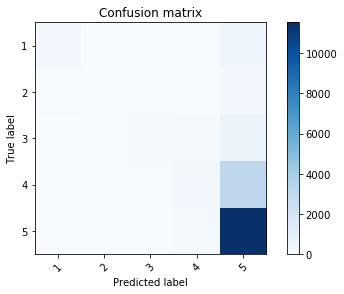

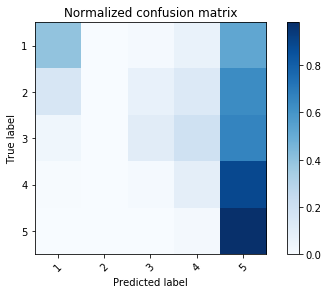

In [12]:


print("confusion matrix")
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["Rating1", "Rating2", "Rating3","Rating4", "Rating5"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

In [13]:
#Bernoulli Model
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

accuracy_score(y_test,prediction['Bernoulli'])


0.68712347277743369

confusion matrix
             precision    recall  f1-score   support

    Rating1       0.71      0.39      0.51       917
    Rating2       0.00      0.00      0.00       440
    Rating3       0.53      0.11      0.18      1053
    Rating4       0.40      0.10      0.15      3607
    Rating5       0.71      0.98      0.83     11744

avg / total       0.62      0.69      0.61     17761



C:\Users\Tanaji\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


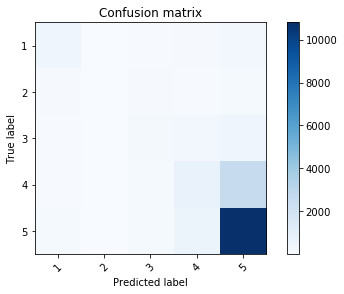

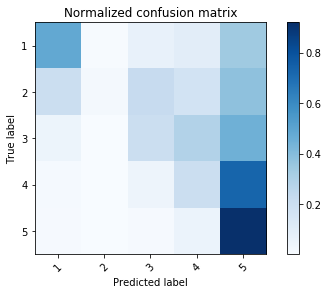

In [14]:
print("confusion matrix")
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["Rating1", "Rating2", "Rating3","Rating4", "Rating5"]))


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Bernoulli'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [15]:
#Support vector classification model
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC
model =LinearSVC().fit(X_train_tfidf, y_train)
prediction['svc']= model.predict(X_test_tfidf)

accuracy_score(y_test,prediction['svc'])


0.70986993975564439

confusion matrix
             precision    recall  f1-score   support

    Rating1       0.63      0.62      0.62       917
    Rating2       0.31      0.10      0.16       440
    Rating3       0.47      0.26      0.33      1053
    Rating4       0.45      0.22      0.29      3607
    Rating5       0.76      0.93      0.84     11744

avg / total       0.66      0.71      0.67     17761



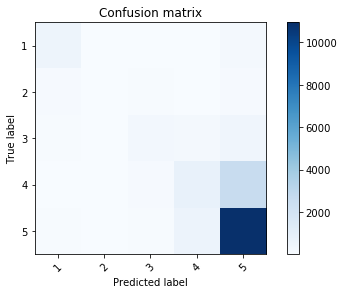

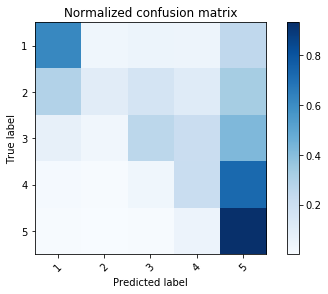

In [16]:
print("confusion matrix")
print(metrics.classification_report(y_test, prediction['svc'], target_names = ["Rating1", "Rating2", "Rating3","Rating4", "Rating5"]))


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cm = confusion_matrix(y_test, prediction['svc'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [17]:
#Logistic Regression Model
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

accuracy_score(y_test,prediction['Logistic'])

0.70074883170992619

confusion matrix
             precision    recall  f1-score   support

    Rating1       0.62      0.60      0.61       917
    Rating2       0.26      0.15      0.19       440
    Rating3       0.40      0.26      0.31      1053
    Rating4       0.43      0.24      0.30      3607
    Rating5       0.77      0.91      0.83     11744

avg / total       0.66      0.70      0.67     17761



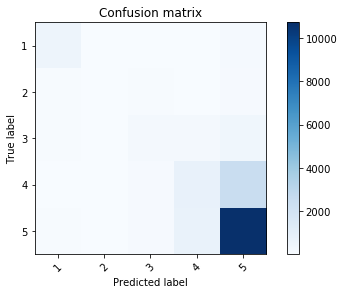

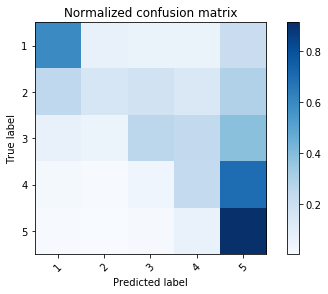

In [18]:
print("confusion matrix")
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["Rating1", "Rating2", "Rating3","Rating4", "Rating5"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [20]:
#Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)
prediction['DTC'] = model.predict(X_test_tfidf)
accuracy_score(y_test,prediction['DTC'])



0.68898147626822814

confusion matrix
             precision    recall  f1-score   support

    Rating1       0.62      0.64      0.63       917
    Rating2       0.34      0.28      0.30       440
    Rating3       0.39      0.30      0.34      1053
    Rating4       0.41      0.30      0.35      3607
    Rating5       0.78      0.86      0.82     11744

avg / total       0.66      0.69      0.67     17761



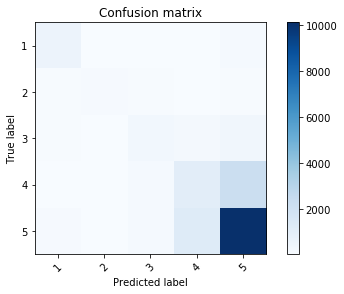

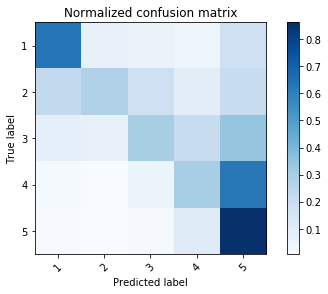

In [21]:
print("confusion matrix")
print(metrics.classification_report(y_test, prediction['DTC'], target_names = ["Rating1", "Rating2", "Rating3","Rating4", "Rating5"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cm = confusion_matrix(y_test, prediction['DTC'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

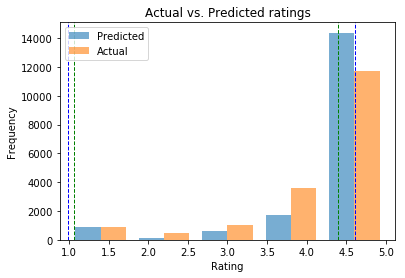

In [21]:
#Plot to show actual vs predicted for svc model

x = prediction['svc']
y = y_test
data = np.vstack([x, y]).T
plt.hist(data,bins=5,alpha=0.6, label=['Predicted', 'Actual'])
plt.axvline(x.mean(), color='b',linestyle='dashed', linewidth=1)
plt.axvline(x.std(), color='b', linestyle='dashed', linewidth=1)

plt.axvline(y.mean(), color='g', linestyle='dashed',linewidth=1)
plt.axvline(y.std(), color='g', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')

plt.title("Actual vs. Predicted ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

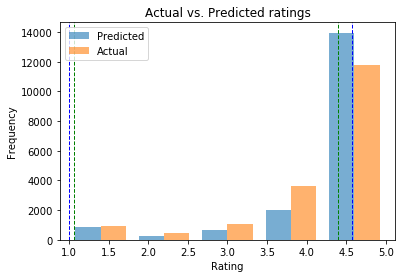

In [26]:
#Plot to show actual vs predicted Logistic

x = prediction['Logistic']
y = y_test
data = np.vstack([x, y]).T
plt.hist(data,bins=5,alpha=0.6, label=['Predicted', 'Actual'])
plt.axvline(x.mean(), color='b',linestyle='dashed', linewidth=1)
plt.axvline(x.std(), color='b', linestyle='dashed', linewidth=1)

plt.axvline(y.mean(), color='g', linestyle='dashed',linewidth=1)
plt.axvline(y.std(), color='g', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')

plt.title("Actual vs. Predicted ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()